In [1]:
pip install numpy pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
!wget $data

--2025-10-08 12:34:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-08 12:34:22 (96.9 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [5]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [8]:
df = df[base]

In [9]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

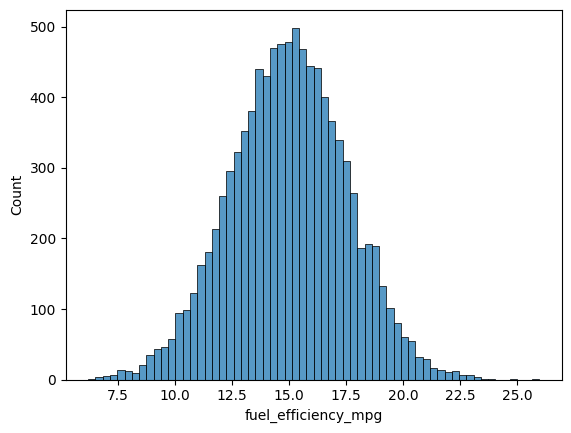

In [11]:
sns.histplot(df.fuel_efficiency_mpg)

In [12]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [13]:
df.horsepower.mode()

0    152.0
Name: horsepower, dtype: float64

In [14]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [16]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [17]:
idx = np.arange(n)

In [18]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [23]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [26]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [27]:
len(y_train)

5824

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
df_train.horsepower.mean()

np.float64(149.54476367006487)

In [30]:
X_train_0 = df_train.fillna(0).values
X_train_mean = df_train.fillna(df_train.horsepower.mean()).values

In [31]:
w0_0, w_0 = train_linear_regression(X_train_0, y_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [32]:
y_pred_0 = w0_0 + X_train_0.dot(w_0)
y_pred_mean = w0_mean + X_train_0.dot(w_mean)

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
round(rmse(y_train, y_pred_0), 2)

np.float64(0.52)

In [35]:
round(rmse(y_train, y_pred_mean), 2)

np.float64(0.62)

In [36]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    print(r, round(rmse(y_val, y_pred), 2))

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.52
10 0.52
100 0.52


In [39]:
std = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df = pd.read_csv('car_fuel_efficiency.csv')
    df = df[base]
    n = len(df)
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    std = np.append (std, (round(rmse(y_train, y_pred), 2)))
std

array([0.52, 0.51, 0.52, 0.52, 0.52, 0.52, 0.51, 0.52, 0.52, 0.52])

In [40]:
round (np.std(std), 3)

np.float64(0.004)

In [41]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,175.0,2775.381743,2014
1,160,166.0,3542.655183,2012
2,250,173.0,1354.787120,2007
3,260,75.0,2531.997079,2005
4,250,175.0,2609.369103,2004
...,...,...,...,...
1935,200,167.0,3470.715658,2003
1936,180,144.0,3605.310144,2016
1937,180,154.0,3346.965671,2018
1938,210,152.0,2500.175687,2020


In [42]:
df = pd.read_csv('car_fuel_efficiency.csv')
df = df[base]
n = len(df)
idx = np.arange(n)
np.random.seed(i)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [43]:
df_train = pd.concat([df_train, df_val], axis=0)

In [44]:
df_train = df_train.reset_index(drop=True)

In [45]:
y_train = np.append(y_train, y_val)

In [46]:
X_train = prepare_X(df_train)

In [47]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

In [48]:
X_val = prepare_X(df_val)

In [49]:
y_pred = w0 + X_val.dot(w)

In [50]:
round(rmse(y_val, y_pred), 3)

np.float64(0.513)